# Datos de la actividad fisica de las personas para el periodo 2017 - 2018 de NHANES

### Librerias

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

### Cargar Datos de NHANES


In [2]:
(
    nhanes.load.load_NHANES_data(year='2017-2018')
)

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [3]:
# modificar nombres de las columnas con separadores

nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type = 'snake')
)

nhanes_raw_df

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


### Seleccion de variables a analizar

Para el analisis vamos a utilizar las variables de actividad fisica, condicion de fumador, edad, diagnostico de diabetes, cantidad de azucar en la sangre y Peso debido a que estamos interesados en conocer si las personas con un bajo estado de salud tienden mejorar su actividad fisica.

In [4]:
# Seleccion de las variables de tipo actividad
nhanes_df = (
    nhanes_raw_df.select_columns(
    '*activi*',
    'do_you_now_smoke_cigarettes',
    'age_in_years_at_screening',
    'doctor_told_you_have_diabetes',
    'total_sugars_gm_dr2_tot',
    'current_selfreported_weight_pounds'
    )
    .rename_columns(
        {
            'vigorous_work_activity':'vigorous_work',
            'moderate_work_activity':'moderate_work',
            'vigorous_recreational_activities': 'vigorous_recreational',
            'moderate_recreational_activities':'moderate_recreational',
            'minutes_sedentary_activity':'minutes_sedentary',
            'do_you_now_smoke_cigarettes':'cigarettes',
            'age_in_years_at_screening':'age',
            'doctor_told_you_have_diabetes':'diabetes',
            'total_sugars_gm_dr2_tot':'sugar_gm',
            'current_selfreported_weight_pounds':'weight'
        }
    )
    .replace(
        {
            'sugar_gm':{
                9999:np.nan,
                7777:np.nan
            },
            'diabetes':{
                'Borderline': np.nan
            }
        }
    )
    # ordena las variables segun cantidad de valores faltantes
    .pipe(
        lambda df: (
            df[df.isna().sum().sort_values(ascending = False).index]
            )
        )
    # eliminar todas las observaciones con diabetes nula ya que son pocas
    .dropna(    
        subset =['diabetes'],
        how='any'
    ) 
    # convierte la variale diabetes de tipo object a int
    .transform_column(  
        column_name = 'diabetes',
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df

,cigarettes,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,sugar_gm,diabetes,age
SEQN,,,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
93704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.37,0,2.0
93705.0,Not at all,300.0,0.0,0.0,0.0,1.0,165.0,43.04,0,66.0
93706.0,NaN,240.0,0.0,0.0,0.0,1.0,145.0,NaN,0,18.0
93707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.81,0,13.0
...,...,...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.08,0,4.0
102953.0,Not at all,360.0,1.0,1.0,0.0,0.0,218.0,NaN,0,42.0
102954.0,NaN,600.0,0.0,0.0,0.0,1.0,150.0,87.58,0,41.0


### Visualizacion de valores faltantes

<AxesSubplot:>

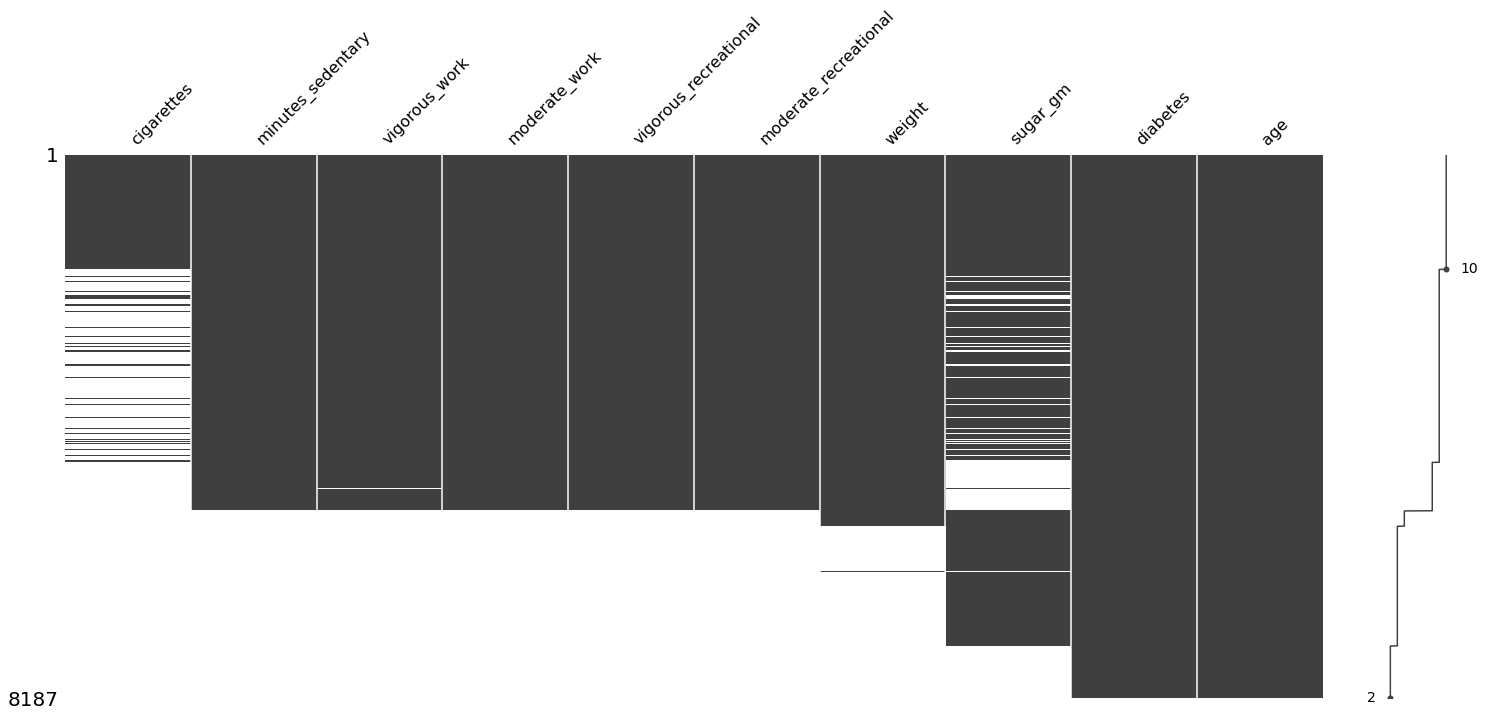

In [5]:
(
    nhanes_df
    .pipe(missingno.matrix, sort='descending')
)

La visualizacion nos indica que hay una gran numero de personas que omiten hablar sobre su actividad fisica y ademas sobre su Peso y su condicion de fumador. Esto indica que el patron de los datos no es completamente aleatorio (Son de tipo MAR), dependen de la variable Peso.

### Eliminar observaciones con valores faltantes en 7 variables

Vamos a eliminar las observaciones con valores faltantes en las variables cigarettes, minutes_sedentary, vigorous_work, moderate_work, vigorous_recreational, moderate_recreational y weight debido a su alta correlacion y tambien para disminuir la cantidad de valores faltantes en la data

In [6]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = [
            'cigarettes',
            'minutes_sedentary', 
            'vigorous_work', 
            'moderate_work', 
            'vigorous_recreational',
            'moderate_recreational',
            'weight'
            ],
        how='all'
    )
    .pipe(
        lambda df: (
            df[df.isna().sum().sort_values(ascending = False).index]
            )
        )
    #.pipe(missingno.matrix, sort='descending')
)


### Visualizacion de los valores faltantes 

<AxesSubplot:>

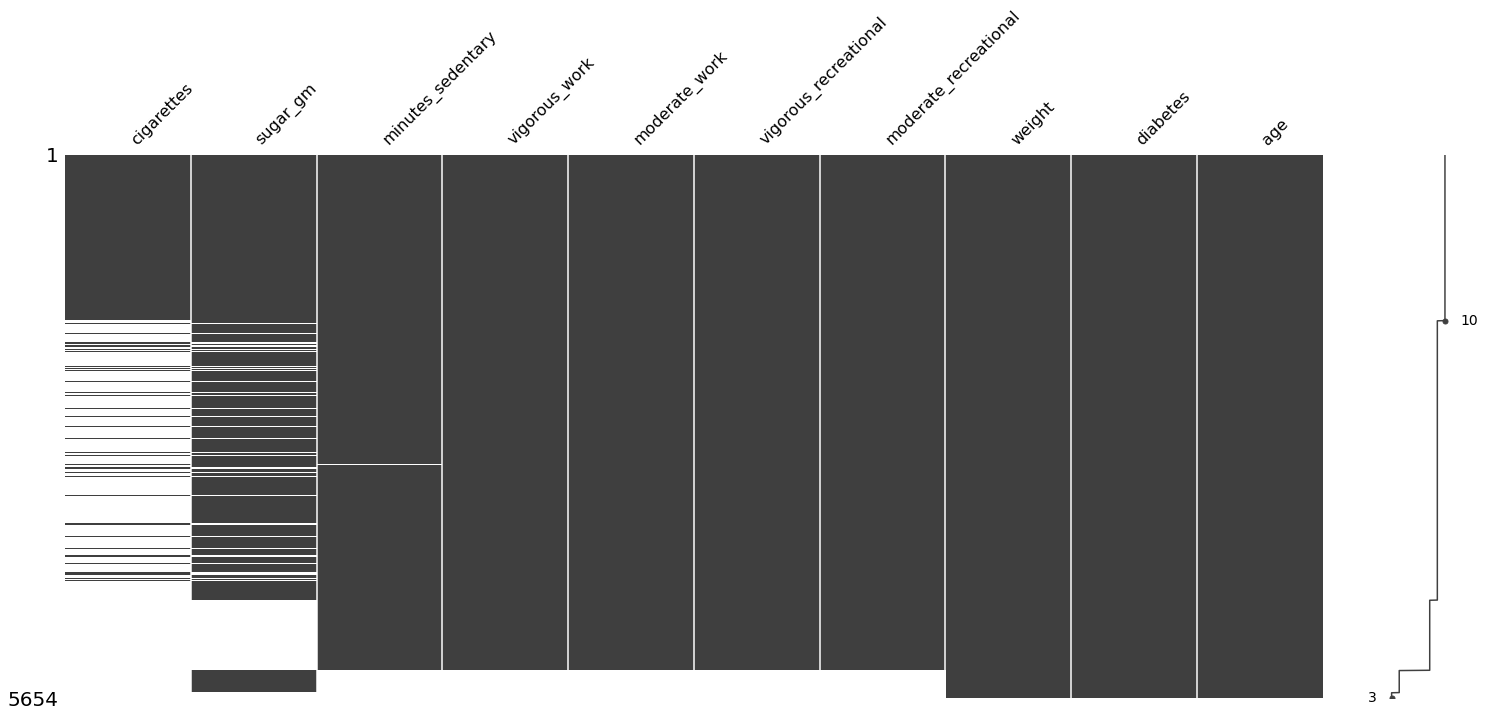

In [7]:
(
    nhanes_df
    .pipe(missingno.matrix, sort='descending')
)

De esta manera obtenemos los datos limpios y tratados para su posterior analisis. Cuenta con 5654 observaciones y 10 variables